<a href="https://colab.research.google.com/github/nxxk23/PROJECT/blob/main/Quartile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
slope = pd.read_excel('/content/drive/MyDrive/Thesis Project Kidney/Assign 3 : Re-Calculate Slope/SlopeFiltered.xlsx')
slope.head()

,PatientUID,PatientVisitUID,ResultItemName,eGFR,datetime,slopes,time_difference
0,2299,3640924,eGFR(CKD-EPI) age >=18,66.8,2016-11-11 09:40:06.053,NaN,NaN
1,2299,4020970,eGFR(CKD-EPI) age >=18,67.2,2017-03-31 10:18:54.363,0.002857,140.0
2,2299,4286612,eGFR(CKD-EPI) age >=18,69.2,2017-07-05 10:40:40.763,0.020833,96.0
3,2299,4546471,eGFR(CKD-EPI) age >=18,63.6,2017-10-03 09:19:54.710,-0.062921,89.0
4,2299,4801938,eGFR(CKD-EPI) age >=18,58.4,2018-01-04 09:03:28.847,-0.056522,92.0


In [3]:
import pandas as pd

# Define the number of groups
num_groups = 4

# Calculate the quantiles to divide the data into equal-sized groups and assign quartile labels
slope['quartile_group'] = pd.qcut(slope['slopes'], num_groups, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate the quartiles for each group
quartiles = slope.groupby('quartile_group')['slopes'].quantile([0.25, 0.5, 0.75])

# Iterate over quartile groups and print the quartiles
for group_label, group_data in quartiles.groupby('quartile_group'):
    print(f'Group {group_label}:')
    print(group_data)
    print('-----------------------------------')

Group Q1:
quartile_group      
Q1              0.25   -0.322697
                0.50   -0.159419
                0.75   -0.098044
Name: slopes, dtype: float64
-----------------------------------
Group Q2:
quartile_group      
Q2              0.25   -0.043905
                0.50   -0.028111
                0.75   -0.015484
Name: slopes, dtype: float64
-----------------------------------
Group Q3:
quartile_group      
Q3              0.25    0.004048
                0.50    0.016374
                0.75    0.032143
Name: slopes, dtype: float64
-----------------------------------
Group Q4:
quartile_group      
Q4              0.25    0.087755
                0.50    0.155260
                0.75    0.344828
Name: slopes, dtype: float64
-----------------------------------


In [4]:
slope

,PatientUID,PatientVisitUID,ResultItemName,eGFR,datetime,slopes,time_difference,quartile_group
0,2299,3640924,eGFR(CKD-EPI) age >=18,66.80,2016-11-11 09:40:06.053,NaN,NaN,NaN
1,2299,4020970,eGFR(CKD-EPI) age >=18,67.20,2017-03-31 10:18:54.363,0.002857,140.0,Q3
2,2299,4286612,eGFR(CKD-EPI) age >=18,69.20,2017-07-05 10:40:40.763,0.020833,96.0,Q3
3,2299,4546471,eGFR(CKD-EPI) age >=18,63.60,2017-10-03 09:19:54.710,-0.062921,89.0,Q2
4,2299,4801938,eGFR(CKD-EPI) age >=18,58.40,2018-01-04 09:03:28.847,-0.056522,92.0,Q2
...,...,...,...,...,...,...,...,...
313434,3417416,10528067,eGFR(CKD-EPI) age >=18,48.95,2023-03-28 13:59:40.430,-0.084091,110.0,Q1
313435,3432056,10235244,eGFR(CKD-EPI) age >=18,48.51,2023-01-09 12:31:53.220,NaN,NaN,NaN
313436,3432056,10306813,eGFR(CKD-EPI) age >=18,67.71,2023-01-27 12:22:43.000,1.129412,17.0,Q4
313437,3432056,10408954,eGFR(CKD-EPI) age >=18,68.69,2023-02-24 21:05:12.747,0.039200,25.0,Q3


In [5]:
# Count the number of records in each group
group_counts = slope['quartile_group'].value_counts()

# Iterate over quartile groups and print the count
for group_label, count in group_counts.items():
    print(f'Quartile Group {group_label}: {count} records')

Quartile Group Q1: 73271 records
Quartile Group Q2: 73269 records
Quartile Group Q4: 73268 records
Quartile Group Q3: 73263 records


In [7]:
quartile = slope[['PatientUID','PatientVisitUID','eGFR','datetime','slopes','time_difference','quartile_group']]
quartile

,PatientUID,PatientVisitUID,eGFR,datetime,slopes,time_difference,quartile_group
0,2299,3640924,66.80,2016-11-11 09:40:06.053,NaN,NaN,NaN
1,2299,4020970,67.20,2017-03-31 10:18:54.363,0.002857,140.0,Q3
2,2299,4286612,69.20,2017-07-05 10:40:40.763,0.020833,96.0,Q3
3,2299,4546471,63.60,2017-10-03 09:19:54.710,-0.062921,89.0,Q2
4,2299,4801938,58.40,2018-01-04 09:03:28.847,-0.056522,92.0,Q2
...,...,...,...,...,...,...,...
313434,3417416,10528067,48.95,2023-03-28 13:59:40.430,-0.084091,110.0,Q1
313435,3432056,10235244,48.51,2023-01-09 12:31:53.220,NaN,NaN,NaN
313436,3432056,10306813,67.71,2023-01-27 12:22:43.000,1.129412,17.0,Q4
313437,3432056,10408954,68.69,2023-02-24 21:05:12.747,0.039200,25.0,Q3


##**check**

In [8]:
import pandas as pd

# Calculate the quartiles and assign quartile labels
slope['quartile_group'] = pd.qcut(slope['slopes'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calculate the minimum and maximum slope for each quartile group
quartile_stats = slope.groupby('quartile_group')['slopes'].agg(['min', 'max'])

# Print the minimum and maximum slope for each quartile group
for group_label, row in quartile_stats.iterrows():
    min_slope = row['min']
    max_slope = row['max']
    print(f'Quartile Group {group_label}:')
    print(f'Min Slope: {min_slope}')
    print(f'Max Slope: {max_slope}')
    print('-----------------------------------')


Quartile Group Q1:
Min Slope: -12.41428571428571
Max Slope: -0.06521739130434782
-----------------------------------
Quartile Group Q2:
Min Slope: -0.06521739130434781
Max Slope: -0.004838709677419366
-----------------------------------
Quartile Group Q3:
Min Slope: -0.004838709677419352
Max Slope: 0.05381443298969078
-----------------------------------
Quartile Group Q4:
Min Slope: 0.05381818181818183
Max Slope: 9.028571428571428
-----------------------------------


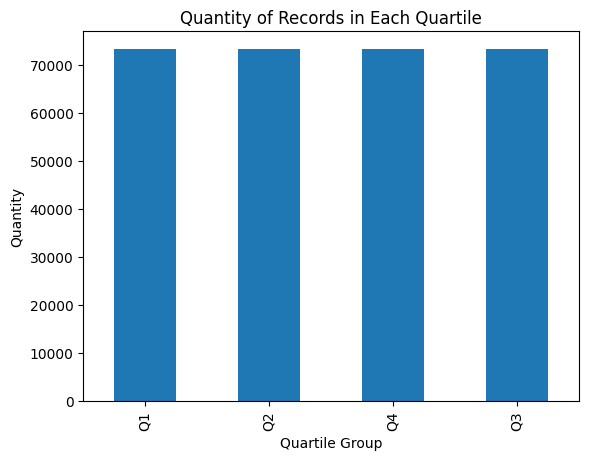

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the quartiles and assign quartile labels
slope['quartile_group'] = pd.qcut(slope['slopes'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Count the number of records in each quartile group
quartile_counts = slope['quartile_group'].value_counts()

# Plot the quantity of records in each quartile
quartile_counts.plot(kind='bar')
plt.xlabel('Quartile Group')
plt.ylabel('Quantity')
plt.title('Quantity of Records in Each Quartile')
plt.show()

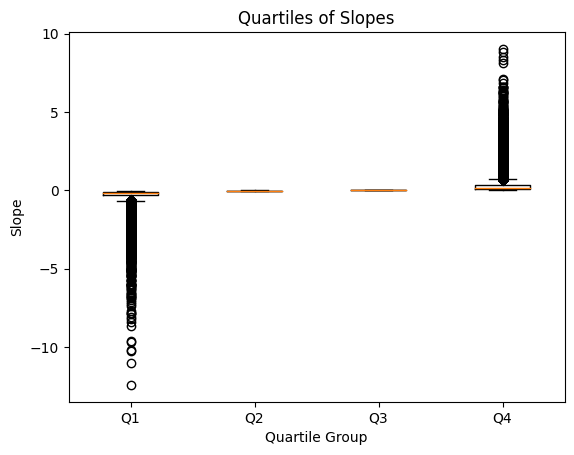

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the quartiles and assign quartile labels
slope['quartile_group'] = pd.qcut(slope['slopes'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Create a boxplot to visualize the quartiles
plt.boxplot([slope[slope['quartile_group'] == 'Q1']['slopes'],
             slope[slope['quartile_group'] == 'Q2']['slopes'],
             slope[slope['quartile_group'] == 'Q3']['slopes'],
             slope[slope['quartile_group'] == 'Q4']['slopes']],
            labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.xlabel('Quartile Group')
plt.ylabel('Slope')
plt.title('Quartiles of Slopes')
plt.show()

In [9]:
quartile.to_csv("Quartile.csv", index=False)

In [10]:
quartile.to_excel("Quartile.xlsx", index=False)